In [1]:
import os
import pandas as pd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

# from s2 lab1
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
import graphviz

#test test

In [2]:


imdb_raw_link = os.path.join(os.getcwd(), 'datasets', 'imdbFinalMerge.csv')
imdb_raw = pd.read_csv(imdb_raw_link)


In [3]:
imdb_raw


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,0,0,1,0,0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,0,0,1,0,0,0,0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,0,0,0,0,0,0,0,0,0,1
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,...,0,0,0,0,0,0,0,0,0,1
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,...,0,0,0,0,0,0,0,0,1,0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,...,1,0,0,0,0,0,0,0,0,0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,...,0,1,0,0,0,0,0,0,0,0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

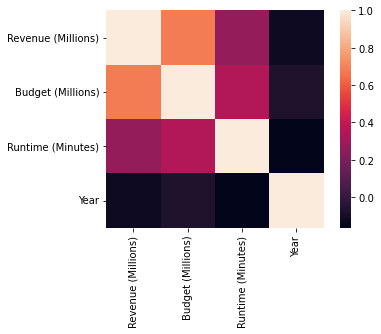

In [4]:
sns.heatmap(imdb_raw[['Revenue (Millions)','Budget (Millions)','Runtime (Minutes)', 'Year']].corr(), vmax=1, square=True)

In [5]:
len(imdb_raw[imdb_raw['Year']==2016])/1000

0.297

In [6]:
imdb_raw[['Revenue (Millions)','Budget (Millions)','Runtime (Minutes)']].corr()

,Revenue (Millions),Budget (Millions),Runtime (Minutes)
Revenue (Millions),1.000000,0.677565,0.267953
Budget (Millions),0.677565,1.000000,0.347476
Runtime (Minutes),0.267953,0.347476,1.000000


In [7]:
imdb_raw['Genre'].unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi',
       'Horror,Thriller', 'Animation,Comedy,Family',
       'Action,Adventure,Fantasy', 'Comedy,Drama,Music', 'Comedy',
       'Action,Adventure,Biography', 'Adventure,Drama,Romance',
       'Adventure,Family,Fantasy', 'Biography,Drama,History',
       'Animation,Adventure,Comedy', 'Action,Comedy,Drama',
       'Action,Thriller', 'Biography,Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Drama,Thriller', 'Drama', 'Crime,Drama,Horror',
       'Action,Adventure,Drama', 'Drama,Thriller',
       'Action,Adventure,Comedy', 'Action,Horror,Sci-Fi',
       'Adventure,Drama,Sci-Fi', 'Action,Adventure,Western',
       'Comedy,Drama', 'Horror', 'Adventure,Drama,Fantasy',
       'Action,Crime,Thriller', 'Action,Crime,Drama',
       'Adventure,Drama,History', 'Crime,Horror,Thriller',
       'Drama,Romance', 'Comedy,Drama,Romance', 'Horror,Mystery,Thriller',
       'Crime,Drama,Mystery', 'Drama,Romance,Thriller',
       'Drama,History,T

In [8]:
revenueCols = ['Runtime (Minutes)','OscarDirectorNomineeWinner','hasOscarActorNomineeWinner',
'Action', 'Adventure','Animation','Biography','Comedy','Crime',
'Drama','Family','Fantasy','History','Horror','Music','Musical','Mystery',
'Romance','Sci-Fi','Sport','Thriller','War','Western',
'Revenue (Millions)','Budget (Millions)',
'2007','2008','2009','2010','2011','2012','2013','2014','2015','2016',
'Title',
'Rating', 'OscarPictureNomineeWinner'
]

imdb_revenue = imdb_raw[revenueCols]
imdb_revenue = imdb_revenue.dropna(how='any')

In [9]:
imdb_revenue


,Runtime (Minutes),OscarDirectorNomineeWinner,hasOscarActorNomineeWinner,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,...,2010,2011,2012,2013,2014,2015,2016,Title,Rating,OscarPictureNomineeWinner
0,121,0.0,0.0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,Guardians of the Galaxy,8.1,0
1,124,1.0,0.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,Prometheus,7.0,0
2,117,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,Split,7.3,0
3,108,0.0,1.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,Sing,7.2,0
4,123,0.0,1.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,Suicide Squad,6.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,97,0.0,0.0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,Take Me Home Tonight,6.3,0
994,88,0.0,0.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,Project X,6.7,0
996,94,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Hostel: Part II,5.5,0
997,98,0.0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,Step Up 2: The Streets,6.2,0


In [10]:
# y=imdb_revenue['SqrtRevenue']
y=imdb_revenue['Revenue (Millions)']

# X=imdb_revenue[['Budget']]
X=imdb_revenue.drop(['Revenue (Millions)', 'Title','Rating', 'OscarPictureNomineeWinner'], axis=1)
# X=imdb_revenue[['Budget']]


# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size = 0.1, random_state =1)
# X_train_rfe_constant = sm.add_constant(X_train)
X_rfe_constant = sm.add_constant(X)

In [11]:
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [12]:
#model1 = smf.ols('Revenue ~ Budget + hasOscarActor', data=imdbmerge2)
lm1 = sm.OLS(y,X_rfe_constant).fit() 
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Revenue (Millions)   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     21.40
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           3.74e-86
Time:                        01:26:50   Log-Likelihood:                -4149.4
No. Observations:                 735   AIC:                             8369.
Df Residuals:                     700   BIC:                             8530.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -29.2890     27.371     -1.070      0.285     -83.028      24.450
Runtime (Minutes)              0.5959      0.190      3.133      0.002       0.222       0.969
OscarDirectorNomineeWinner    -7.1446      8.227     -0.868      0.385     -23.298       9.008
hasOscarActorNomineeWinner    11.1877      6.095      1.836      0.067      -0.778      23.154
Action                       -16.6646      7.845     -2.124      0.034     -32.067      -1.262
Adventure                    -17.4133      8.568     -2.032      0.043     -34.236      -0.590
Animation                     62.9067     13.779      4.565      0.000      35.854      89.960
Biography                      5.1541     10.973      0.470      0.639     -16.390      26.698
Comedy                         2.2658      8.619      0.263      0.793     -14.657      19.189
Crime                        -12.3273      8.459     -1.457      0.145     -28.935       4.281
Drama                        -17.4268      7.761     -2.245      0.025     -32.665      -2.189
Family                        -6.3998     12.093     -0.529      0.597     -30.142      17.342
Fantasy                       -4.3385     10.089     -0.430      0.667     -24.147      15.470
History                      -11.9564     16.819     -0.711      0.477     -44.977      21.065
Horror                        -7.4515     10.978     -0.679      0.497     -29.004      14.101
Music                         13.5529     20.385      0.665      0.506     -26.471      53.576
Musical                      -13.3416     32.369     -0.412      0.680     -76.893      50.210
Mystery                      -10.0521      9.826     -1.023      0.307     -29.344       9.240
Romance                      -15.8228      9.016     -1.755      0.080     -33.524       1.879
Sci-Fi                         7.2513      9.776      0.742      0.458     -11.943      26.446
Sport                         -0.4414     19.580     -0.023      0.982     -38.884      38.001
Thriller                       1.2838      8.503      0.151      0.880     -15.410      17.977
War                          -22.0140     25.794     -0.853      0.394     -72.658      28.630
Western                      -29.5463     32.269     -0.916      0.360     -92.902      33.810
Budget (Millions)              0.9746      0.070     13.857      0.000       0.837       1.113
2007                           0.0706     15.981      0.004      0.996     -31.306      31.448
2008                          23.6107     15.601      1.513      0.131      -7.019      54.240
2009                          22.9209     16.066      1.427      0.154      -8.623      54.465
2010                          18.2479     15.216      1.199      0.231     -11.627      48.123
2011                           0.7682     1

In [13]:
# y=imdb_revenue['SqrtRevenue']
y=imdb_revenue['Revenue (Millions)']

X=imdb_revenue[['Budget (Millions)','Runtime (Minutes)', 'Adventure', 'Animation', 'Drama','Action']]
# X=imdb_revenue.drop(['Revenue','Original_Language'], axis=1)
# X=imdb_revenue[['Budget']]


In [14]:
lm2 = sm.OLS(y,X).fit() 
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Revenue (Millions)   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.718
Method:                 Least Squares   F-statistic:                              312.5
Date:                Tue, 11 Apr 2023   Prob (F-statistic):                   9.97e-198
Time:                        01:26:50   Log-Likelihood:                         -4163.8
No. Observations:                 735   AIC:                                      8340.
Df Residuals:                     729   BIC:                                      8367.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Budget (Millions)     1.0483      0.061     17.322      0.000       0.929       1.167
Runtime (Minutes)     0.3143      0.053      5.954      0.000       0.211       0.418
Adventure           -17.0571      7.626     -2.237      0.026     -32.028      -2.086
Animation            59.6796     12.076      4.942      0.000      35.972      83.387
Drama               -15.7547      6.226     -2.530      0.012     -27.978      -3.531
Action              -13.5077      6.402     -2.110      0.035     -26.077      -0.939
==============================================================================
Omnibus:                      361.160   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3138.725
Skew:                           2.024   Prob(JB):                         0.00
Kurtosis:                      12.279   Cond. No.                         659.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
imdb_revenue["OscarPictureNomineeWinner"] =  imdb_revenue["OscarPictureNomineeWinner"].astype(str) 

([<matplotlib.axis.YTick at 0x7f34eaa74af0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

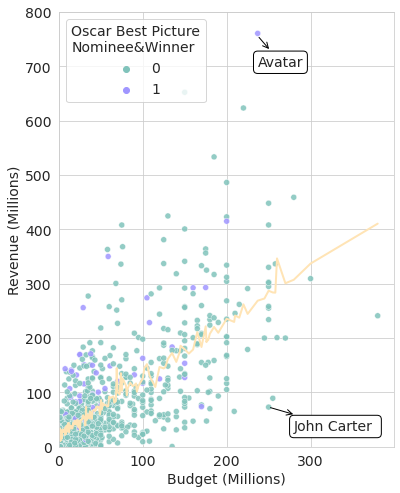

In [16]:
plt.rcParams['font.size'] = 14

plt.figure(figsize=(6,8))

sns.set_style("whitegrid")
# sns.scatterplot(data=imdb_revenue, y='Revenue (Millions)', x='Budget (Millions)', 
# hue='Rating',alpha=0.7, palette=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))  #94c7d8


sns.scatterplot(data=imdb_revenue, y='Revenue (Millions)', x='Budget (Millions)', 
hue='OscarPictureNomineeWinner',alpha=0.85, palette = sns.color_palette(['#80C3BB','#A096FF' ]))
plt.xlim(left=0)  
plt.ylim(bottom=0)  



# sns.lineplot( linewidth = 2, x=imdb_revenue['Budget (Millions)'], y=1.0192*imdb_revenue['Budget (Millions)'],  color='moccasin')
sns.lineplot( linewidth = 2, x=imdb_revenue['Budget (Millions)'], y=lm2.predict(X), color='moccasin',palette=sns.color_palette(['#8db1db']),ci=None)
# plt.legend(title='Rating')

plt.legend(title='Oscar Best Picture\nNominee&Winner',loc='upper left')
plt.annotate('Avatar', 
        (237, 756),          #fc="lightblue", ec="steelblue"
       xytext = (237, 700),
       bbox=dict(boxstyle="round", fc="white", ec="black"),
         arrowprops=dict(arrowstyle="<-",
                                  fc="black", ec="black")
        )

plt.annotate('John Carter ', 
        (250.0, 73.06),
        xytext=(280, 30),
        bbox=dict(boxstyle="round", fc="white", ec='black'),
       arrowprops=dict(arrowstyle="<-",
                                  fc="black", ec="black"))


plt.yticks(range(0,850, 100))


In [17]:
y_pred_linear = lm2.predict(X)

# print(y_pred_linear)
# print('==========')
# print(y_test)
# print('====')
from sklearn.metrics import r2_score
print(r2_score(y, y_pred_linear))
print(np.sqrt(mean_squared_error(y_pred_linear, y)))
# print(np.sqrt(mean_squared_error( lm1.predict(X_train), y_train)))
# 0.5931358227691281

0.4899566803603247
69.8363987101748


In [18]:
imdb_outliers = imdb_revenue

imdb_outliers['difference'] = imdb_outliers['Revenue (Millions)'] - lm2.predict(imdb_outliers[['Budget (Millions)','Runtime (Minutes)', 'Adventure', 'Animation', 'Drama','Action']])
# To get the title of 
imdb_outliers #= pd.merge(left=imdb_outliers, right=imdb_raw[['Title', 'Revenue','Budget']], on=['Revenue','Budget'], how='inner')
imdb_outliers['LargerThanPrediction'] =imdb_outliers['difference']
imdb_outliers['LargerThanPrediction'] =imdb_outliers['LargerThanPrediction'].apply(lambda x: 1 if x > 0 else 0)
imdb_outliers =  pd.merge(left=imdb_outliers, right=imdb_raw[['Metascore','Votes', 'Title','Revenue (Millions)']], on=['Title', 'Revenue (Millions)'], how='inner')
imdb_outliers

,Runtime (Minutes),OscarDirectorNomineeWinner,hasOscarActorNomineeWinner,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,...,2014,2015,2016,Title,Rating,OscarPictureNomineeWinner,difference,LargerThanPrediction,Metascore,Votes
0,121,0.0,0.0,1,1,0,0,0,0,0,...,1,0,0,Guardians of the Galaxy,8.1,0,147.454401,1,76.0,757074
1,124,1.0,0.0,0,1,0,0,0,0,0,...,0,0,0,Prometheus,7.0,0,-31.735815,0,65.0,485820
2,117,1.0,0.0,0,0,0,0,0,0,0,...,0,0,1,Split,7.3,0,91.907281,1,62.0,157606
3,108,0.0,1.0,0,0,1,0,1,0,0,...,0,0,1,Sing,7.2,0,98.071411,1,59.0,60545
4,123,0.0,1.0,1,1,0,0,0,0,0,...,0,0,1,Suicide Squad,6.2,0,132.426136,1,40.0,393727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,97,0.0,0.0,0,0,0,0,1,0,1,...,0,0,0,Take Me Home Tonight,6.3,0,-27.733763,0,NaN,45419
731,88,0.0,0.0,0,0,0,0,1,0,0,...,0,0,0,Project X,6.7,0,14.478496,1,48.0,164088
732,94,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,Hostel: Part II,5.5,0,-22.700701,0,46.0,73152
733,98,0.0,0.0,0,0,0,0,0,0,1,...,0,0,0,Step Up 2: The Streets,6.2,0,18.848842,1,50.0,70699


In [19]:
imdb_outliers['predicted_revenue'] =  lm2.predict(imdb_outliers[['Budget (Millions)','Runtime (Minutes)', 'Adventure', 'Animation', 'Drama','Action']])

In [20]:
imdb_outliers

,Runtime (Minutes),OscarDirectorNomineeWinner,hasOscarActorNomineeWinner,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,...,2015,2016,Title,Rating,OscarPictureNomineeWinner,difference,LargerThanPrediction,Metascore,Votes,predicted_revenue
0,121,0.0,0.0,1,1,0,0,0,0,0,...,0,0,Guardians of the Galaxy,8.1,0,147.454401,1,76.0,757074,185.675599
1,124,1.0,0.0,0,1,0,0,0,0,0,...,0,0,Prometheus,7.0,0,-31.735815,0,65.0,485820,158.195815
2,117,1.0,0.0,0,0,0,0,0,0,0,...,0,1,Split,7.3,0,91.907281,1,62.0,157606,46.212719
3,108,0.0,1.0,0,0,1,0,1,0,0,...,0,1,Sing,7.2,0,98.071411,1,59.0,60545,172.248589
4,123,0.0,1.0,1,1,0,0,0,0,0,...,0,1,Suicide Squad,6.2,0,132.426136,1,40.0,393727,192.593864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,97,0.0,0.0,0,0,0,0,1,0,1,...,0,0,Take Me Home Tonight,6.3,0,-27.733763,0,NaN,45419,34.653763
731,88,0.0,0.0,0,0,0,0,1,0,0,...,0,0,Project X,6.7,0,14.478496,1,48.0,164088,40.241504
732,94,0.0,0.0,0,0,0,0,0,0,0,...,0,0,Hostel: Part II,5.5,0,-22.700701,0,46.0,73152,40.240701
733,98,0.0,0.0,0,0,0,0,0,0,1,...,0,0,Step Up 2: The Streets,6.2,0,18.848842,1,50.0,70699,39.161158


In [21]:
imdb_outliers[['difference']].describe()

,difference
count,735.000000
mean,-0.531873
std,69.881928
min,-199.934393
25%,-35.354692
50%,-12.947594
75%,18.833500
max,491.712672


In [22]:
imdb_outliers_complete = imdb_outliers
imdb_outliers = imdb_outliers[(imdb_outliers['difference'] >= 21.6) | (imdb_outliers['difference'] <= -34.33)]
imdb_outliers

,Runtime (Minutes),OscarDirectorNomineeWinner,hasOscarActorNomineeWinner,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,...,2015,2016,Title,Rating,OscarPictureNomineeWinner,difference,LargerThanPrediction,Metascore,Votes,predicted_revenue
0,121,0.0,0.0,1,1,0,0,0,0,0,...,0,0,Guardians of the Galaxy,8.1,0,147.454401,1,76.0,757074,185.675599
2,117,1.0,0.0,0,0,0,0,0,0,0,...,0,1,Split,7.3,0,91.907281,1,62.0,157606,46.212719
3,108,0.0,1.0,0,0,1,0,1,0,0,...,0,1,Sing,7.2,0,98.071411,1,59.0,60545,172.248589
4,123,0.0,1.0,1,1,0,0,0,0,0,...,0,1,Suicide Squad,6.2,0,132.426136,1,40.0,393727,192.593864
5,103,0.0,1.0,1,1,0,0,0,0,0,...,0,1,The Great Wall,6.1,0,-113.922141,0,42.0,56036,159.052141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,133,0.0,0.0,0,0,0,0,0,0,1,...,0,0,Across the Universe,7.4,0,-48.885005,0,56.0,95172,73.225005
723,104,0.0,0.0,0,0,0,0,1,0,0,...,0,0,Let's Be Cops,6.5,0,31.877665,1,30.0,112729,50.512335
725,102,0.0,0.0,0,1,0,0,1,0,0,...,0,0,Your Highness,5.6,0,-45.754401,0,31.0,87904,67.314401
726,92,0.0,0.0,0,0,0,0,0,0,0,...,0,0,Final Destination 5,5.9,0,-35.608071,0,50.0,88000,78.188071


In [23]:
genre = ['Adventure','Animation','Biography','Comedy','Crime',
'Drama','Family','Fantasy','History','Horror','Music','Musical','Mystery',
'Romance','Sci-Fi','Sport','Thriller','War','Western']

imdb_genre = imdb_outliers_complete[imdb_outliers_complete['Action']==1] 
imdb_genre = imdb_genre.loc[:,['Title','Revenue (Millions)']]
imdb_genre['Genre'] = 'Action'
for i in range(0, len(genre)):
    temp = imdb_outliers_complete[imdb_outliers_complete[genre[i]]==1] 
    temp = temp.loc[:,['Title','Revenue (Millions)']]
    temp.loc[:,['Genre']] = genre[i]
    # print(temp)
    imdb_genre = pd.concat([imdb_genre, temp], ignore_index=True)

imdb_genre

,Title,Revenue (Millions),Genre
0,Guardians of the Galaxy,333.13,Action
1,Suicide Squad,325.02,Action
2,The Great Wall,45.13,Action
3,The Lost City of Z,8.01,Action
4,Jason Bourne,162.16,Action
...,...,...,...
1938,The Magnificent Seven,93.38,Western
1939,Django Unchained,162.80,Western
1940,True Grit,171.03,Western
1941,A Million Ways to Die in the West,42.62,Western


([<matplotlib.axis.YTick at 0x7f34ea17a940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

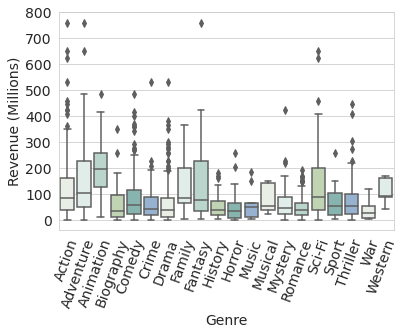

In [24]:

# Set your custom color palette
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")
colors2 = ['#e9f1e4', '#deefe9','#b6d9ce','#bfd8ae','#7fbcb5','#8db1db']
sns.boxplot(x='Genre', y='Revenue (Millions)', data=imdb_genre, palette=sns.color_palette(colors2))
plt.xticks(rotation=70, rotation_mode='anchor', horizontalalignment="right")
plt.yticks(ticks=range(0,801, 100) )

<AxesSubplot:xlabel='LargerThanPrediction', ylabel='Votes'>

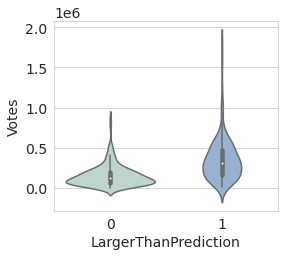

In [25]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.figure(figsize=(4,3.5))

colors = ['#b9d9ce','#8db1db']
# Set your custom color palette

sns.set_style("whitegrid")
# g.set_yticks(range(11))

# sns.diverging_palette(0, 230, 90, 60)
sns.violinplot(data=imdb_outliers, x="LargerThanPrediction", y="Votes", palette=sns.color_palette(colors))


In [26]:
# plt.figure(figsize=(5,4))
# sns.violinplot(data=imdb_outliers, x="LargerThanPrediction", y="Metascore")
# sns.set_style("whitegrid")
# g.set_yticks(range(100))


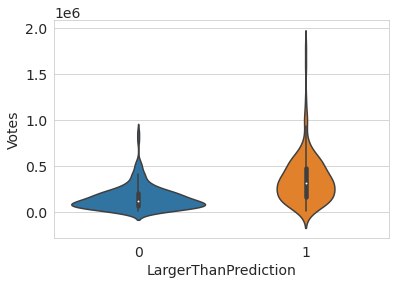

In [27]:
sns.violinplot(data=imdb_outliers, x="LargerThanPrediction", y="Votes")
sns.set_style("whitegrid")
# g.set_yticks(range(2000000))

### Examine the genres

In [28]:
imdb_positive = imdb_outliers[imdb_outliers['LargerThanPrediction']==1]
imdb_positive
imdb_positive[['Rating', 'Votes', 'Metascore', 'Runtime (Minutes)']].describe()

,Rating,Votes,Metascore,Runtime (Minutes)
count,173.000000,1.730000e+02,168.000000,173.000000
mean,7.143353,3.516028e+05,66.505952,117.369942
std,0.834520,2.593864e+05,14.548699,18.605501
min,4.100000,6.809000e+03,30.000000,81.000000
25%,6.600000,1.613960e+05,57.000000,104.000000
50%,7.300000,3.093980e+05,68.000000,115.000000
75%,7.800000,4.743200e+05,77.000000,129.000000
max,9.000000,1.791916e+06,96.000000,165.000000


In [29]:
imdb_negative = imdb_outliers[imdb_outliers['LargerThanPrediction']==0]
imdb_negative
imdb_negative[['Rating', 'Votes', 'Metascore', 'Runtime (Minutes)']].describe()

,Rating,Votes,Metascore,Runtime (Minutes)
count,195.000000,195.000000,187.000000,195.000000
mean,6.578974,152613.733333,53.871658,118.800000
std,0.907767,130233.334664,16.366258,19.749096
min,1.900000,1109.000000,11.000000,83.000000
25%,6.100000,62249.000000,40.500000,105.500000
50%,6.600000,117590.000000,54.000000,116.000000
75%,7.200000,201416.500000,66.000000,128.500000
max,8.400000,865134.000000,96.000000,187.000000


In [30]:
imdb_outliers

,Runtime (Minutes),OscarDirectorNomineeWinner,hasOscarActorNomineeWinner,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,...,2015,2016,Title,Rating,OscarPictureNomineeWinner,difference,LargerThanPrediction,Metascore,Votes,predicted_revenue
0,121,0.0,0.0,1,1,0,0,0,0,0,...,0,0,Guardians of the Galaxy,8.1,0,147.454401,1,76.0,757074,185.675599
2,117,1.0,0.0,0,0,0,0,0,0,0,...,0,1,Split,7.3,0,91.907281,1,62.0,157606,46.212719
3,108,0.0,1.0,0,0,1,0,1,0,0,...,0,1,Sing,7.2,0,98.071411,1,59.0,60545,172.248589
4,123,0.0,1.0,1,1,0,0,0,0,0,...,0,1,Suicide Squad,6.2,0,132.426136,1,40.0,393727,192.593864
5,103,0.0,1.0,1,1,0,0,0,0,0,...,0,1,The Great Wall,6.1,0,-113.922141,0,42.0,56036,159.052141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,133,0.0,0.0,0,0,0,0,0,0,1,...,0,0,Across the Universe,7.4,0,-48.885005,0,56.0,95172,73.225005
723,104,0.0,0.0,0,0,0,0,1,0,0,...,0,0,Let's Be Cops,6.5,0,31.877665,1,30.0,112729,50.512335
725,102,0.0,0.0,0,1,0,0,1,0,0,...,0,0,Your Highness,5.6,0,-45.754401,0,31.0,87904,67.314401
726,92,0.0,0.0,0,0,0,0,0,0,0,...,0,0,Final Destination 5,5.9,0,-35.608071,0,50.0,88000,78.188071


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=02d6283e-b942-4af8-8973-cba3d72db73f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>